Text(0.5, 1.0, 'Average numbers of award wins normalized by total award wins')

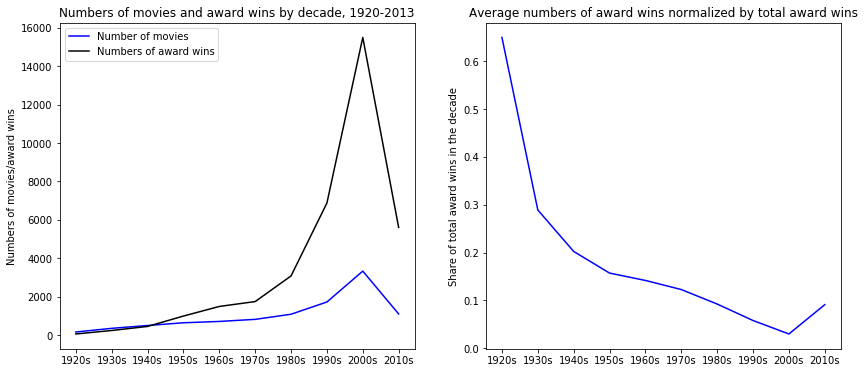

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import seaborn as sns
import math
from data_gen import gen_df

# Importing data and making new dataframe
filename = 'imdb.csv'
df = gen_df(filename)
imdb = df.copy()

imdb['nrOfWins_tot'] = imdb.groupby('decade')['nrOfWins'].transform(lambda x : x.sum())

imdb['nrOfWins_share'] = imdb['nrOfWins']/imdb['nrOfWins_tot']*100
imdb['nrOfWins_share_avg'] = imdb.groupby('decade')['nrOfWins_share'].transform(lambda x: x.mean())


# Generate variable that counts number of observation/movies in each year
imdb['temp']=1
imdb['tot_film'] = imdb.groupby('decade')['temp'].transform(lambda x : x.sum())
del imdb['temp']


y = pd.DataFrame(imdb.groupby('decade')['nrOfWins_tot'].first())
y['nrOfWins_share'] = imdb.groupby('decade')['nrOfWins_share_avg'].first()
y['tot_film'] = imdb.groupby('decade')['tot_film'].first()
y.reset_index(inplace=True)


fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1)

ax1.plot(y['decade'], y['tot_film'], color='blue', label='Number of movies')
ax1.plot(y['decade'], y['nrOfWins_tot'], color='black', label='Numbers of award wins')
ax1.legend(loc='upper left');
ax1.set_ylabel('Numbers of movies/award wins')
ax1.set_title(f'Numbers of movies and award wins by decade, 1920-2013')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(y['decade'], y['nrOfWins_share'], color='blue')
ax2.set_ylabel('Share of total award wins in the decade')
ax2.set_title(f'Average numbers of award wins normalized by total award wins')